# **FINAL NOTEBOOK — BigMart Clustering Project**

## 📝 Project Description

This project focuses on applying clustering techniques to the BigMart Sales dataset.  
The goal is to explore the data, clean it, engineer meaningful features, and apply multiple clustering algorithms such as **K-Means**, **PCA-based clustering**, and **DBSCAN** to uncover hidden patterns in product sales and outlet characteristics.

The notebook includes:
- Data loading and initial exploration  
- Cleaning and preprocessing  
- Feature engineering and encoding  
- Scaling and dimensionality reduction  
- Applying and comparing clustering algorithms  
- Visualizing clusters and extracting business insights


## 📦 Libraries & Environment Setup

This project uses essential Python libraries for data analysis, visualization, preprocessing, and clustering.

### ✅ Core Libraries
- **pandas** – Data manipulation and analysis  
- **numpy** – Numerical operations  
- **matplotlib / seaborn** – Data visualization  
- **scikit-learn** – Preprocessing, scaling, PCA, and clustering algorithms  

### ✅ Environment
The notebook runs in **Google Colab**, which provides:
- Pre-installed scientific libraries  
- GPU/CPU runtime options  
- Easy file upload and integration with Google Drive  


## **Data Loading + Before Cleaning Analysis**

### **Load the Dataset**

In [29]:
## Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل الداتا
df = pd.read_csv(r"BigMart_Sales_Data.csv")

# عرض أول 5 صفوف
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **Dataset Structure**

In [30]:
# بنشوف معلومات الأعمدة وأنواعها
df.info()

print("#"*100)

# إحصائيات الأعمدة الرقمية
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
#############################################

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### **Missing Values Before Cleaning**

In [31]:
# بنحسب عدد القيم الناقصة في كل عمود
missing = df.isnull().sum()

# بنعرض بس الأعمدة اللي فيها Missing
missing[missing > 0]


Item_Weight    1463
Outlet_Size    2410
dtype: int64

### **Check Duplicate Rows**

In [32]:
# بنشوف عدد الصفوف المكررة
df.duplicated().sum()


np.int64(0)

### **Numerical Columns Distribution Before Cleaning**

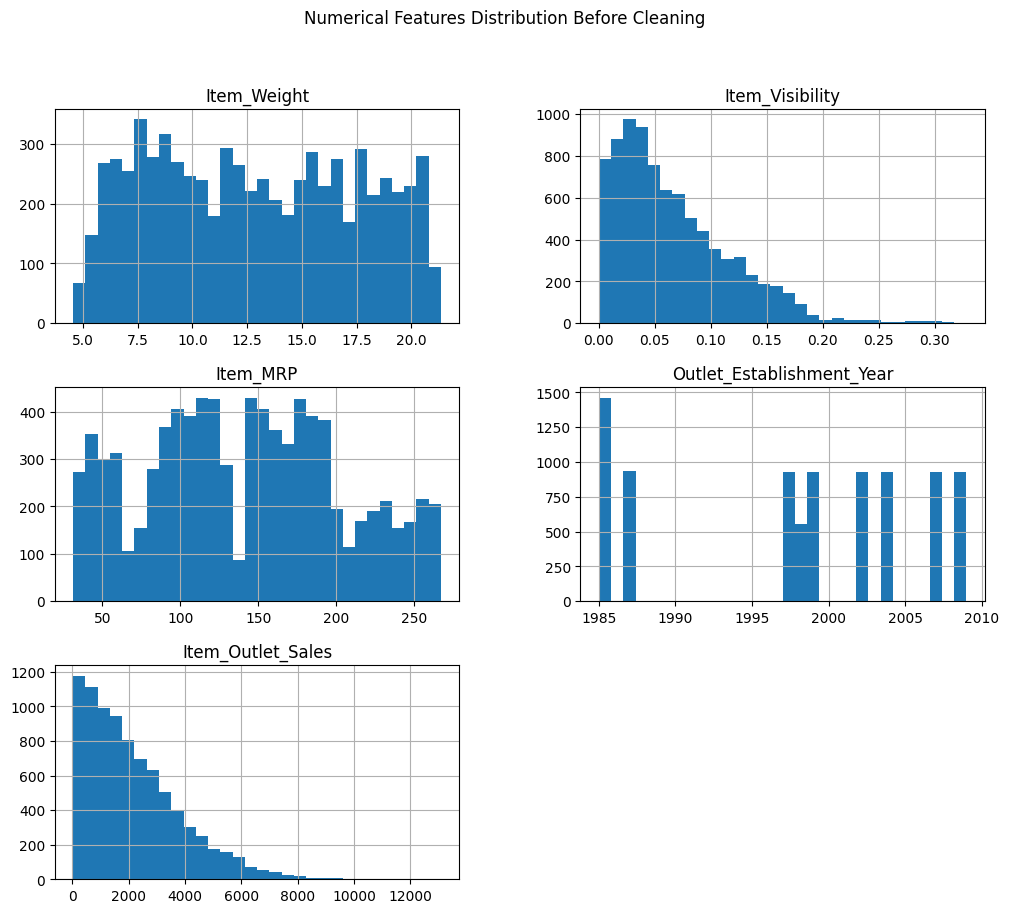

In [33]:
# بنرسم Histogram لكل عمود رقمي
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=30)
plt.suptitle("Numerical Features Distribution Before Cleaning")
plt.show()

### **Outliers Visualization (Before Cleaning)**

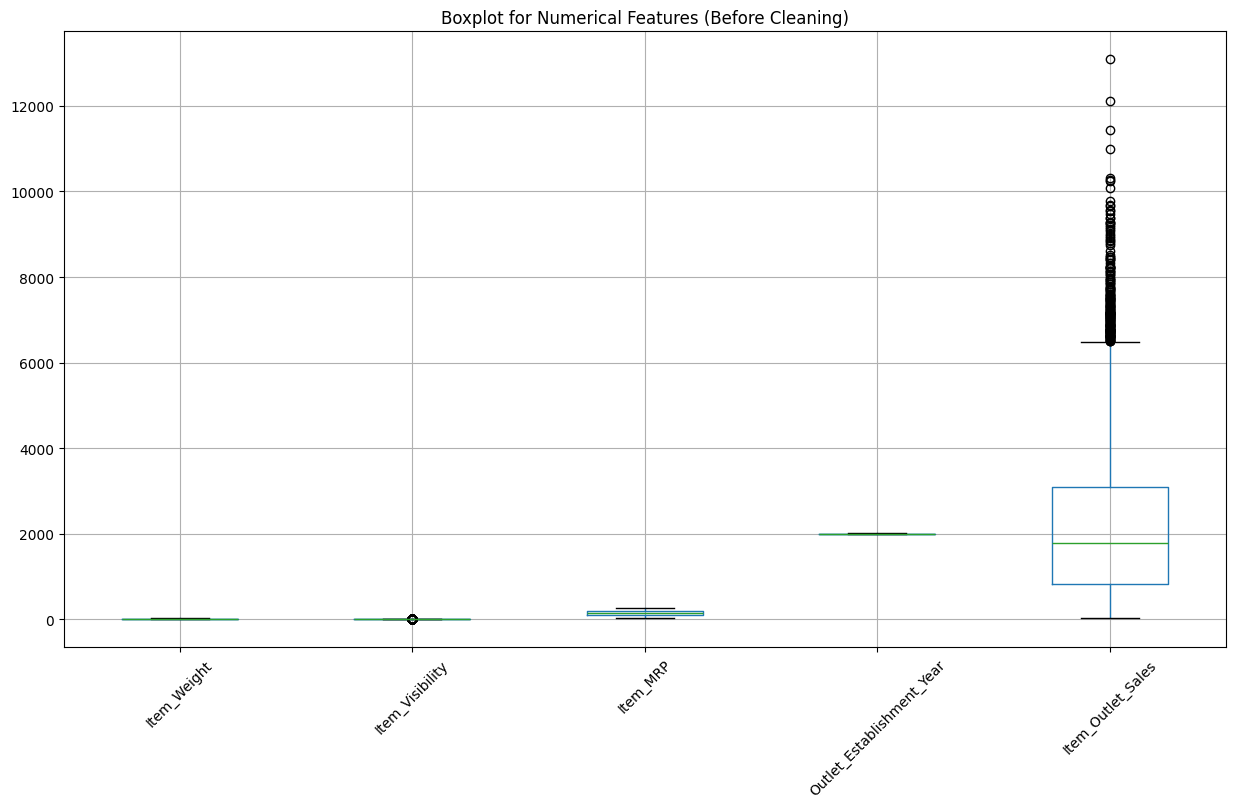

In [34]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot for Numerical Features (Before Cleaning)")
plt.xticks(rotation=45)
plt.show()
## نلاحظ إن بعض المتغيرات فيها skew واضح وفيه أوتلايرز محتاجة معالجة في مرحلة التنضيف.



### **Categorical Columns Overview**

In [35]:
# بنجيب الأعمدة الكاتيجوري
cat_cols = df.select_dtypes(include=['object']).columns

# بنعرض أول 5 قيم من كل عمود كاتيجوري
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())
    print("#"*100)



Column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
Name: count, dtype: int64
####################################################################################################

Column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
####################################################################################################

Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: count, dtype: int64
####################################################################################################

Column: Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
Name: count, dtype: int64
###########################################################################

### **Correlation Heatmap**

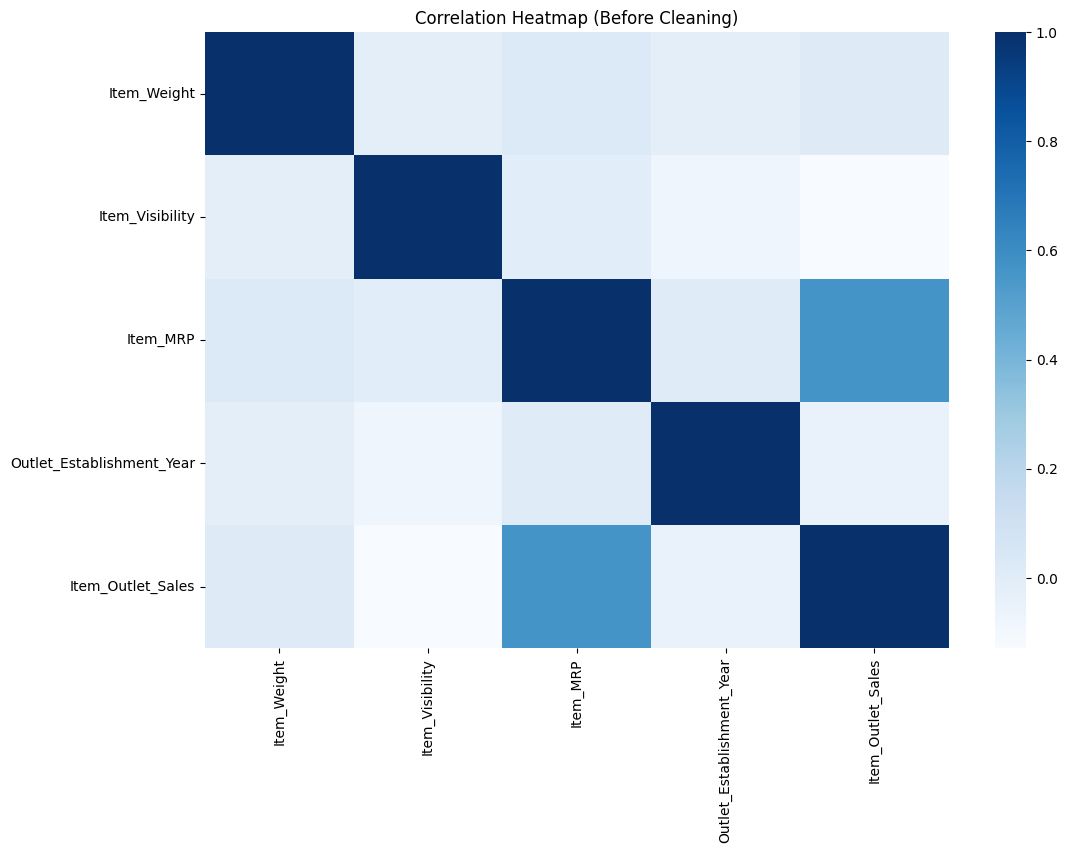

In [36]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="Blues")
plt.title("Correlation Heatmap (Before Cleaning)")
plt.show()

## **Cleaning + Feature Engineering + Encoding + Scaling**

### **Fix Missing Values**

In [37]:
print("Outlier Before")
print("#"*20)
print(df.isnull().sum())

#  تحديد الأعمدة الرقمية والكاتيجوري
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# معالجة الأعمدة الرقمية باستخدام الـ Median
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))

# معالجة الأعمدة النصية باستخدام الـ Mode
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

#  التأكد إن مفيش قيم مفقودة بعد المعالجة
print("Outlier After")
print("#"*20)
print(df.isnull().sum())


Outlier Before
####################
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Outlier After
####################
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


### **Outliers Removal Using IQR**

In [38]:
# بنطبق IQR على كل عمود رقمي
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # بنشيل القيم الشاذة
    df = df[(df[col] >= lower) & (df[col] <= upper)]


### **Check Data After Cleaning**

In [39]:
df.info()
print("#"*100)
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8193 non-null   object 
 1   Item_Weight                8193 non-null   float64
 2   Item_Fat_Content           8193 non-null   object 
 3   Item_Visibility            8193 non-null   float64
 4   Item_Type                  8193 non-null   object 
 5   Item_MRP                   8193 non-null   float64
 6   Outlet_Identifier          8193 non-null   object 
 7   Outlet_Establishment_Year  8193 non-null   int64  
 8   Outlet_Size                8193 non-null   object 
 9   Outlet_Location_Type       8193 non-null   object 
 10  Outlet_Type                8193 non-null   object 
 11  Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 832.1+ KB
##################################################

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,12.823585,0.063221,139.104030,1998.089711,2089.540121
std,4.268070,0.046285,61.536438,8.286946,1501.498356
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.026818,92.980400,1987.000000,857.550400
50%,12.600000,0.052729,141.147000,1999.000000,1783.678200
75%,16.100000,0.092783,183.663400,2004.000000,3020.068800
max,21.350000,0.195721,266.888400,2009.000000,6478.234000


### **Create New Useful Features**

In [40]:
# عدد سنين تشغيل المحل
df['Years_Operating'] = 2025 - df['Outlet_Establishment_Year']

# نسبة الـ Visibility للوزن
df['Visibility_Per_Weight'] = df['Item_Visibility'] / df['Item_Weight']

# تقسيم السعر لفئات
df['MRP_Category'] = pd.qcut(df['Item_MRP'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


### **Clean Categorical Values**

In [41]:
# توحيد القيم المختلفة لنفس المعنى
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


### **Encode Categorical Features**

In [42]:
# Label Encoding للأعمدة اللي فيها ترتيب
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['MRP_Category'] = le.fit_transform(df['MRP_Category'])

# OneHot Encoding للأعمدة اللي ملهاش ترتيب
for col in ['Outlet_Type', 'Outlet_Location_Type']:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)


### **Scale Numerical Data**

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# بنختار الأعمدة الرقمية بعد التنضيف
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaled_data = scaler.fit_transform(df[num_cols])

# بنحولهم DataFrame تاني
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

scaled_df.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Operating,Visibility_Per_Weight,MRP_Category
0,-0.825619,-1.019273,1.799128,0.109853,1.096037,-0.109853,-0.787787,1.342416
1,-1.617595,-0.949463,-1.476205,1.316644,-1.096383,-1.316644,-0.478385,-0.446526
2,1.095741,-1.003872,0.040856,0.109853,0.005148,-0.109853,-0.942959,-1.340997
3,1.494072,-1.366002,0.698669,-0.010826,-0.903926,0.010826,-1.136514,-1.340997
4,-0.912315,-1.366002,-1.385323,-1.338296,-0.729206,1.338296,-1.136514,-0.446526


### **Scaling Comparison**

In [44]:
# قبل
df[num_cols].describe()

# بعد
scaled_df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Operating,Visibility_Per_Weight,MRP_Category
count,8.193000e+03,8.193000e+03,8.193000e+03,8.193000e+03,8.193000e+03,8.193000e+03,8.193000e+03,8.193000e+03
mean,5.047429e-16,3.772563e-17,1.409291e-16,7.729418e-15,-2.038051e-17,-5.116810e-17,-1.699822e-16,1.344247e-16
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-1.937431e+00,-1.366002e+00,-1.752143e+00,-1.579654e+00,-1.369549e+00,-1.316644e+00,-1.136514e+00,-1.340997e+00
25%,-8.256193e-01,-7.865495e-01,-7.495794e-01,-1.338296e+00,-8.205570e-01,-7.132483e-01,-7.174381e-01,-1.340997e+00
50%,-5.238880e-02,-2.267000e-01,3.320137e-02,1.098529e-01,-2.037169e-01,-1.098529e-01,-2.642066e-01,-4.465259e-01
75%,7.677041e-01,6.387288e-01,7.241578e-01,7.132483e-01,6.197712e-01,1.338296e+00,4.323084e-01,4.479452e-01
max,1.997844e+00,2.862882e+00,2.076691e+00,1.316644e+00,2.923055e+00,1.579654e+00,6.001366e+00,1.342416e+00


## **PCA + KMeans + DBSCAN + Evaluation + Visualization + Comparison**

### **Apply PCA for 2D Visualization**

In [45]:
from sklearn.decomposition import PCA

# بنطبق PCA على الداتا بعد الـ Scaling
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# بنحولهم DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

pca_df.head()


,PC1,PC2
0,1.183418,-1.395415
1,1.320158,1.081595
2,0.622450,-1.156375
3,0.652126,-1.563641
4,-1.521319,-1.567074


### **PCA Explained Variance**

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = {}
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_df)
    scores[k] = silhouette_score(scaled_df, labels)


### **KMeans: Choosing Number of Clusters (Elbow Method)**

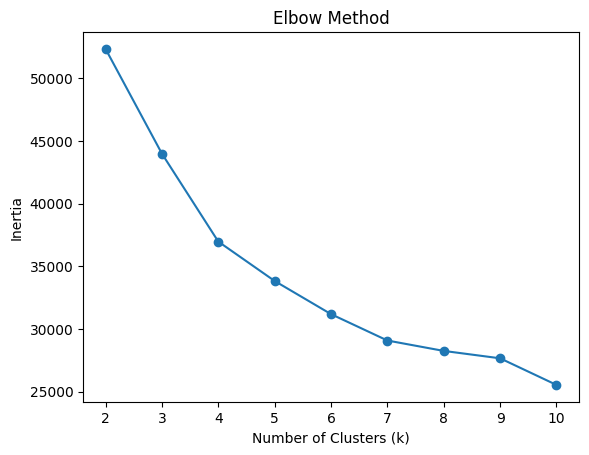

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

# بنجرب من 2 لـ 10 كلاسترز
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


### **Train Final KMeans Model**

In [48]:
# بنختار k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# بنضيف الليبلز للداتا
pca_df['KMeans_Cluster'] = kmeans_labels


### **Visualize KMeans Clusters**

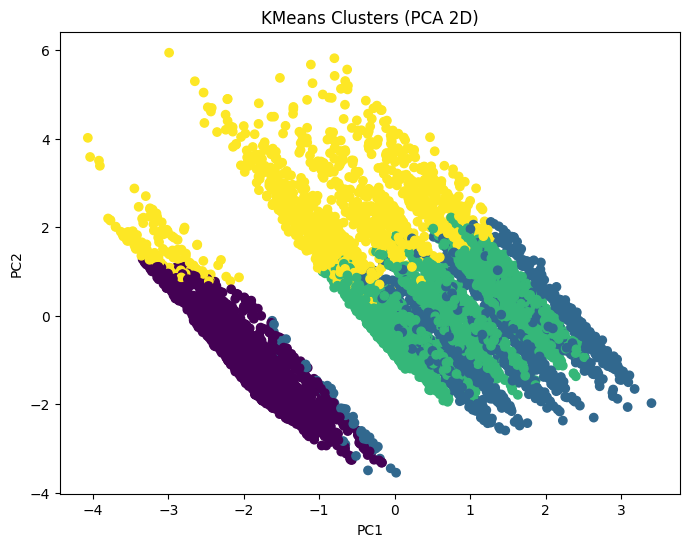

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### **KMeans Evaluation Metrics**

In [50]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_km = silhouette_score(scaled_df, kmeans_labels)
db_km = davies_bouldin_score(scaled_df, kmeans_labels)
ch_km = calinski_harabasz_score(scaled_df, kmeans_labels)

print("KMeans Silhouette Score:", sil_km)
print("KMeans Davies-Bouldin Index:", db_km)
print("KMeans Calinski-Harabasz Score:", ch_km)


KMeans Silhouette Score: 0.23634690522351817
KMeans Davies-Bouldin Index: 1.4062845135910838
KMeans Calinski-Harabasz Score: 2108.4950209597228


### Apply **DBSCAN**

In [51]:
from sklearn.cluster import DBSCAN

# تجربة مجموعة قيم مختلفة
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_df)

        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise = list(dbscan_labels).count(-1)

        print(f"eps={eps}, min_samples={min_samples} → clusters={n_clusters}, noise points={n_noise}")


eps=0.5, min_samples=5 → clusters=137, noise points=3589
eps=0.5, min_samples=10 → clusters=50, noise points=5886
eps=1.0, min_samples=5 → clusters=7, noise points=80
eps=1.0, min_samples=10 → clusters=6, noise points=232
eps=1.5, min_samples=5 → clusters=2, noise points=3
eps=1.5, min_samples=10 → clusters=2, noise points=9


In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)
db_labels = dbscan.fit_predict(scaled_df)

pca_df['DBSCAN_Cluster'] = db_labels

### **Visualize DBSCAN Clusters**

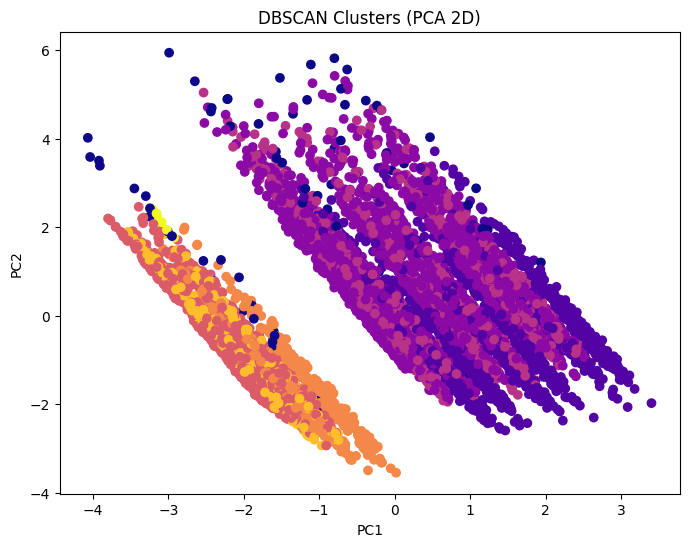

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=db_labels, cmap='plasma')
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### **DBSCAN Evaluation Metrics**

In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_km = silhouette_score(scaled_df, kmeans_labels)
db_km = davies_bouldin_score(scaled_df, kmeans_labels)
ch_km = calinski_harabasz_score(scaled_df, kmeans_labels)

if len(set(db_labels)) > 1:
    sil_db = silhouette_score(scaled_df, db_labels)
    db_db = davies_bouldin_score(scaled_df, db_labels)
    ch_db = calinski_harabasz_score(scaled_df, db_labels)
else:
    sil_db = db_db = ch_db = None

comparison = pd.DataFrame({
    "Metric": ["Silhouette","Davies-Bouldin","Calinski-Harabasz"],
    "KMeans": [sil_km, db_km, ch_km],
    "DBSCAN": [sil_db, db_db, ch_db]
})

comparison


,Metric,KMeans,DBSCAN
0,Silhouette,0.236347,0.175245
1,Davies-Bouldin,1.406285,1.712682
2,Calinski-Harabasz,2108.495021,1002.220214


### **Cluster Analysis**

In [55]:
df['Cluster'] = kmeans.labels_
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

cluster_summary = df.groupby('Cluster')[numeric_cols].mean()[[
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Item_Outlet_Sales',
    'Years_Operating'
]]

cluster_summary

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Operating
Cluster,,,,,
0,12.916896,0.058617,134.023946,2163.044854,39.202797
1,13.385411,0.056264,221.368426,3309.276348,22.953504
2,13.623677,0.043197,112.876954,1695.464352,22.269700
3,10.062228,0.127867,121.463870,1619.325668,24.580357


### Final **Conclusion**

In [56]:
print("""
. KMeans كان أفضل في التقسيم العام وطلع كلاسترز واضحة.
. DBSCAN كان أحسن في التعامل مع الـ Noise لكنه ساعات مبيعملش كلاسترز واضحة.
. الداتا فيها شوية تشتت، وده أثر على DBSCAN.
. بشكل عام KMeans مناسب أكتر للداتا دي.
""")



. KMeans كان أفضل في التقسيم العام وطلع كلاسترز واضحة.
. DBSCAN كان أحسن في التعامل مع الـ Noise لكنه ساعات مبيعملش كلاسترز واضحة.
. الداتا فيها شوية تشتت، وده أثر على DBSCAN.
. بشكل عام KMeans مناسب أكتر للداتا دي.

